In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 11]
import numpy as np

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from SVM_TDA_sparse import test_tda_svm_sparse
from SVM_sparse import test_svm_sparse

from mlxtend.plotting import plot_decision_regions


from algo import algo
from utils import plot_interesting_points, plot_accuracy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
n = 70
s = 4
step = 2
nb_iter = 20
C = 0.1

* n = number of points to be labelled at all
* s = number of points to be labelled at each step of the dendrogram
* step = we train a SVM using 0 to n points every step points
* nb_iter = number of training of the SVM with random points
* C = C parameter for SVM

# SVM

### Choose your dataset (PCA plot)

Once you have choosen the dataset, just tune n, s, step and nb_iter and run every cell.  
Don't forget to tune C parameter of SVM though

[0.92461872 0.05306648]


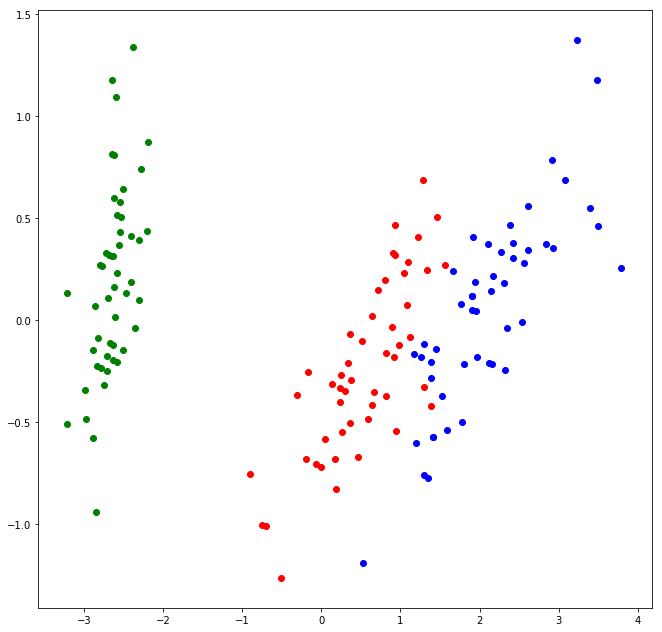

In [4]:
# X, Y = datasets.load_breast_cancer(True)
# X, Y = datasets.load_wine(True)
X, Y = datasets.load_iris(True)

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(X)
Xt = pca.transform(X)
print(pca.explained_variance_ratio_)


for i in range(len(X)):
    if Y[i]==0:
        plt.scatter(Xt[i, 0], Xt[i, 1], c='g')
    elif Y[i]==1:
        plt.scatter(Xt[i, 0], Xt[i, 1], c='r')
    else:
        plt.scatter(Xt[i, 0], Xt[i, 1], c='b')


#### Plotting points our algo has found

CPU times: user 24 ms, sys: 40 ms, total: 64 ms
Wall time: 22.1 ms


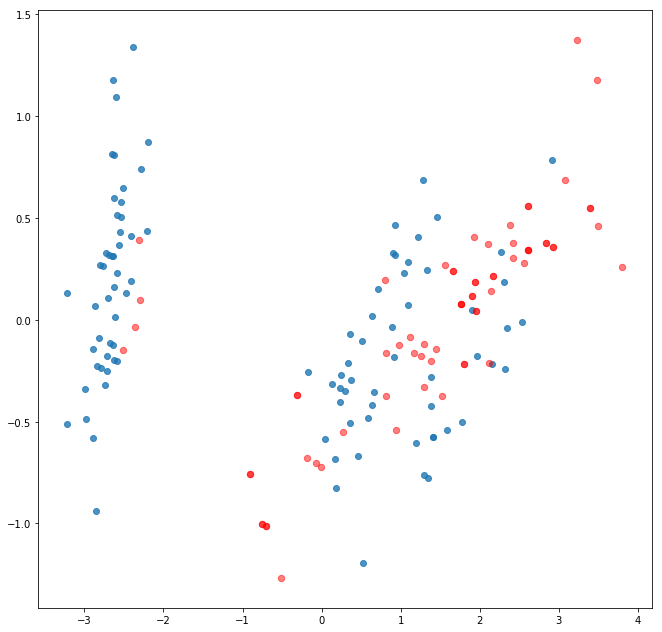

In [5]:
%time best = algo(X, n//2, s=s, min_size=2, metric='euclidean')
plot_interesting_points(Xt, best)

#### Train SVM and plot result

In [6]:
%time x_tda_svm, y_tda_svm = test_tda_svm_sparse(X, Y, n, step, best, C=C)
%time x_svm, y_svm = test_svm_sparse(np.copy(X), Y, n, step, nb_iter, C=C); print()

0.00	2.94	5.88	8.82	11.76	14.71	17.65	20.59	23.53	26.47	29.41	32.35	35.29	38.24	41.18	44.12	47.06	50.00	52.94	55.88	58.82	61.76	64.71	67.65	70.59	73.53	76.47	79.41	82.35	85.29	88.24	91.18	94.12	97.06	CPU times: user 40 ms, sys: 0 ns, total: 40 ms
Wall time: 36.1 ms
0.00	2.86	5.71	8.57	11.43	14.29	17.14	20.00	22.86	25.71	28.57	31.43	34.29	37.14	40.00	42.86	45.71	48.57	51.43	54.29	57.14	60.00	62.86	65.71	68.57	71.43	74.29	77.14	80.00	82.86	85.71	88.57	91.43	94.29	
CPU times: user 448 ms, sys: 12 ms, total: 460 ms
Wall time: 452 ms


Text(0.5,1,'4 pairs/levels, euclidean distance, min_size_cluster=2')

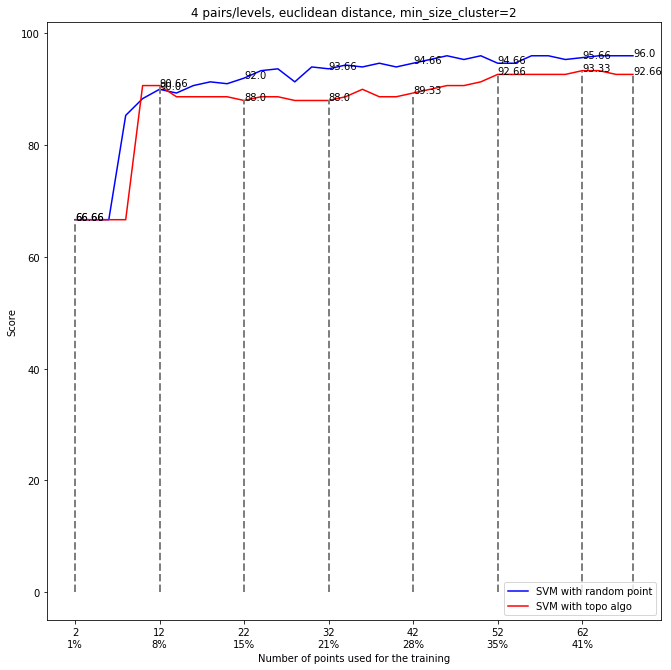

In [7]:
plot_accuracy(x_svm, y_svm*100, "SVM with random point", x_tda_svm, y_tda_svm*100, "SVM with topo algo", factor=5, step=step, nb_iter=nb_iter, filename="", size=len(X))
plt.title("{} pairs/levels, euclidean distance, min_size_cluster=2".format(s))